This project is aimed at implementing the Perceptron classifier. 

The program that implements the Perceptron in order to classify the following set of points:
 - (6, 9), (8, 14), (9, 7), (9, 11), (11, 8), (14,2), (16, 5), (17, 10), and (19, 3). 
Figure 1 in images illustrates how such points must be classified.

In [1]:
import matplotlib.pyplot as plt

In [2]:
w0 = 0
w1 = -0.5
w2 = 2

alpha = 0.2

In [3]:
green_dots = [(6,9), (8, 14), (9, 7), (9, 11), (11, 8)]
red_triangles = [(14, 2), (16, 5), (17, 10), (19, 3)]

#dataset = green_dots + red_triangles

In [4]:
def function(x):
    return (-w1/w2 * x) - (w0/w2)

In [5]:
X1 = []
X2 = []

for x in range(20):
   y = function(x)
   X1.append(x)
   X2.append(y)

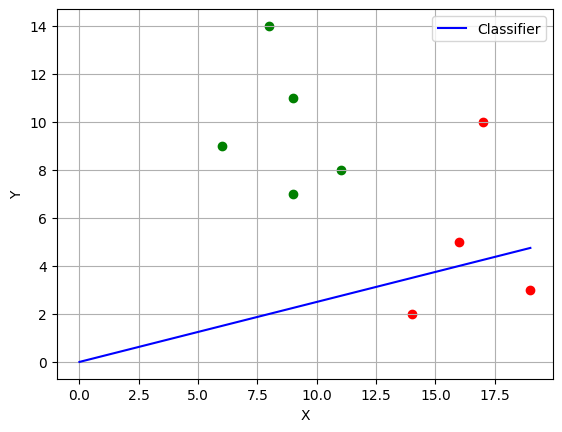

In [6]:
plt.plot(X1, X2, label='Classifier', color='blue')
plt.scatter([coor[0] for coor in green_dots], [coor[1] for coor in green_dots], color='green')
plt.scatter([coor[0] for coor in red_triangles], [coor[1] for coor in red_triangles], color='red')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()